# Global feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and plot a linegraph of the results across the ensemble. 

# Importe modules

In [2]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definition

In [3]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_xarr
from Fonctions import get_3D_budget_xarr

# Read files : radiative budget, tas

In [4]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

# The official_amip experiment : 

path=path_official
filename='*_amip_*.nc'
official_amip = get_3D_xarr(path, filename, variables)
official_amip_N = get_3D_budget_xarr(path, filename, variables)

# The official_amip-future4K experiment : 

filename='*_amip-future4K_*.nc'
official_future4K = get_3D_xarr(path, filename, variables)
official_future4K_N = get_3D_budget_xarr(path, filename, variables)

In [6]:
# The p193_amip experiment : 

path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['rlut', 'rsut','rsdt','tas']

path=path_PPE+'/CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p193f2/'
filename='*_amip_*.nc'
p193_amip = get_3D_xarr(path, filename, variables)
p193_amip_N = get_3D_budget_xarr(path, filename, variables)

# The p193_amip-future4K experiment : 

path=path_PPE+'/CNRM-CM6-1_amip-future4K_PPE/CNRM-CM6-1_amip-future4K_r1i1p193f2/'
filename='*_amip-future4K_*.nc'
p193_future4K = get_3D_xarr(path, filename, variables)
p193_future4K_N = get_3D_budget_xarr(path, filename, variables)

# Compute : Delta(TOA), Delta(tas), Lambda

In [7]:
official_Delta_tas = official_future4K['tas'] - official_amip['tas']
official_Delta_N = official_future4K_N - official_amip_N
official_Lambda = official_Delta_N/official_Delta_tas
official_Lambda

<xarray.DataArray (lat: 128, lon: 256)>
dask.array<truediv, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6

In [8]:
p193_Delta_tas = p193_future4K['tas'] - p193_amip['tas']
p193_Delta_N = p193_future4K_N - p193_amip_N
p193_Lambda = p193_Delta_N/p193_Delta_tas
p193_Lambda

<xarray.DataArray (lat: 128, lon: 256)>
dask.array<truediv, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 2.0

In [12]:
diff_Lambda=p193_Lambda-official_Lambda
diff_Lambda

<xarray.DataArray (lat: 128, lon: 256)>
dask.array<sub, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 2.0

# Create plot

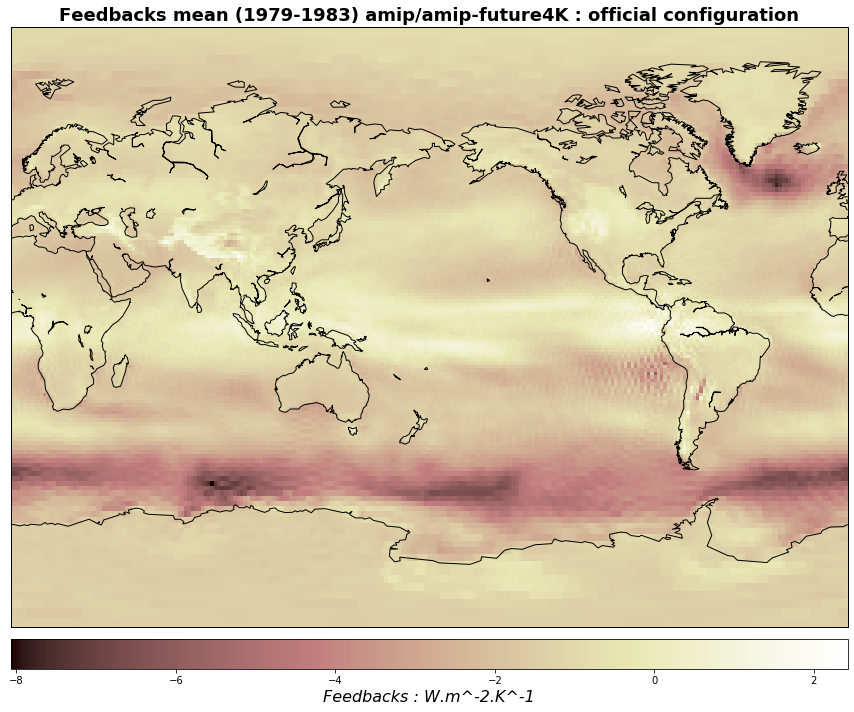

In [10]:
#result = test.to_xarray()

lat = official_Lambda['lat'][:]
lon = official_Lambda['lon'][:]

# Plot of maps of feedbacks in official run
fig = plt.figure(figsize=(15, 15))
ax=plt.gca()

data = official_Lambda[:,:]
ax.set_title("Feedbacks mean (1979-1983) amip/amip-future4K : official configuration", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.pink)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Feedbacks : W.m^-2.K^-1', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPEofficial_lambda_map.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

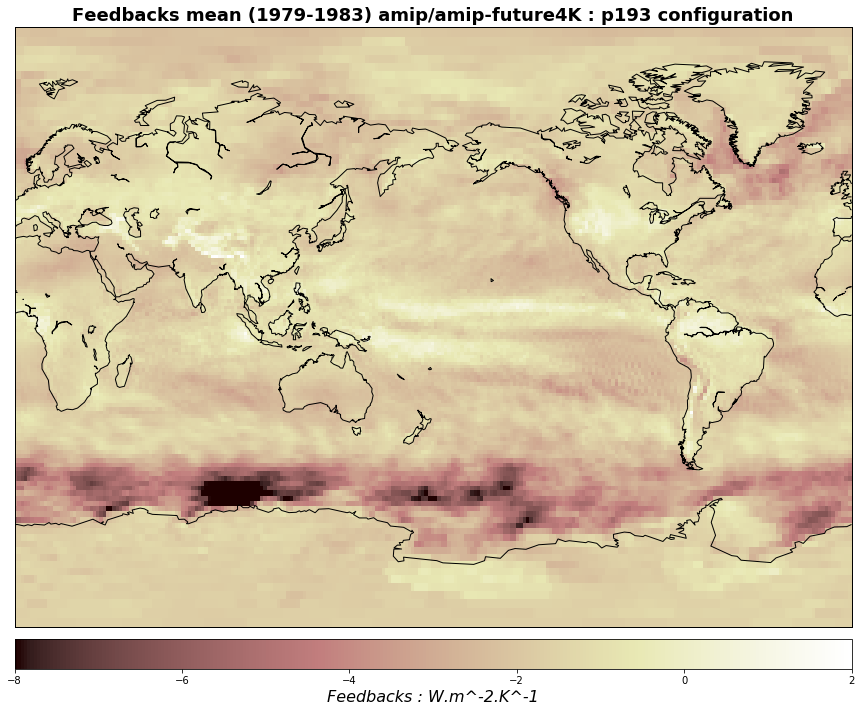

In [17]:
#result = test.to_xarray()

lat = p193_Lambda['lat'][:]
lon = p193_Lambda['lon'][:]

# Plot of maps of feedbacks in official run
fig = plt.figure(figsize=(15, 15))
ax=plt.gca()

data = p193_Lambda[:,:]
ax.set_title("Feedbacks mean (1979-1983) amip/amip-future4K : p193 configuration", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.pink)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Feedbacks : W.m^-2.K^-1', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()
plt.clim(-8, 2)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPEp193_lambda_map.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

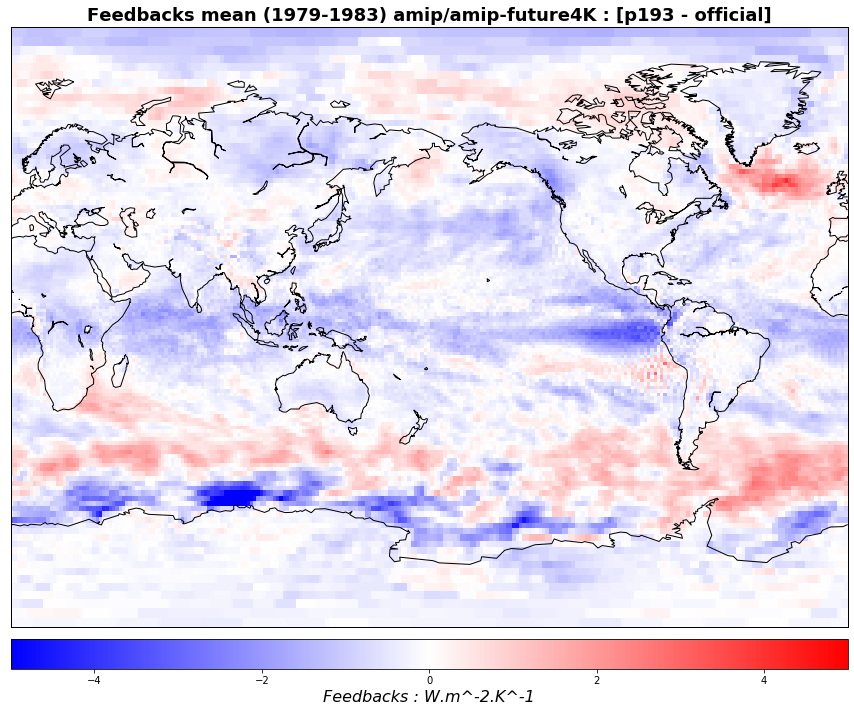

In [16]:

#result = test.to_xarray()

lat = diff_Lambda['lat'][:]
lon = diff_Lambda['lon'][:]

# Plot of maps of feedbacks in official run
fig = plt.figure(figsize=(15, 15))
ax=plt.gca()

data = diff_Lambda[:,:]
ax.set_title("Feedbacks mean (1979-1983) amip/amip-future4K : [p193 - official]", fontsize=18, 
             fontweight = 'bold')
m = Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')
x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.bwr)
#m.colorbar()
cbar = m.colorbar(location='bottom', spacing = 'uniform')
#cbar.set_ticks(np.arange(230,10,300))
cbar.set_label ('Feedbacks : W.m^-2.K^-1', size = 16, style = 'italic')
m.drawcoastlines()
m.drawmapboundary()
plt.clim(-5, 5)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_diff-lambda_map.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()